In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd
from cmcrameri import cm
import matplotlib as mpl

In [2]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'#'/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)

In [3]:
window = 10000 
df = pd.DataFrame({'3.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})
counts = pd.DataFrame({'3.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '7.0':[0, 0, 0, 0, 0, 0, 0, 0]})

aad = pd.DataFrame({'3.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})

ad = pd.DataFrame({'3.0':[[], [], [], [], [], [], [], []],
                   '3.1':[[], [], [], [], [], [], [], []],
                   '3.2':[[], [], [], [], [], [], [], []],
                   '3.3':[[], [], [], [], [], [], [], []],
                   '3.4':[[], [], [], [], [], [], [], []],
                   '3.5':[[], [], [], [], [], [], [], []],
                   '3.6':[[], [], [], [], [], [], [], []],
                   '3.7':[[], [], [], [], [], [], [], []],
                   '3.8':[[], [], [], [], [], [], [], []],
                   '3.9':[[], [], [], [], [], [], [], []],
                   '4.0':[[], [], [], [], [], [], [], []],
                   '4.1':[[], [], [], [], [], [], [], []],
                   '4.2':[[], [], [], [], [], [], [], []],
                   '4.3':[[], [], [], [], [], [], [], []],
                   '4.4':[[], [], [], [], [], [], [], []],
                   '4.5':[[], [], [], [], [], [], [], []],
                   '4.6':[[], [], [], [], [], [], [], []],
                   '4.7':[[], [], [], [], [], [], [], []],
                   '4.8':[[], [], [], [], [], [], [], []],
                   '4.9':[[], [], [], [], [], [], [], []],
                   '5.0':[[], [], [], [], [], [], [], []],
                   '5.1':[[], [], [], [], [], [], [], []],
                   '5.2':[[], [], [], [], [], [], [], []],
                   '5.3':[[], [], [], [], [], [], [], []],
                   '5.4':[[], [], [], [], [], [], [], []],
                   '5.5':[[], [], [], [], [], [], [], []],
                   '5.6':[[], [], [], [], [], [], [], []],
                   '5.7':[[], [], [], [], [], [], [], []],
                   '5.8':[[], [], [], [], [], [], [], []],
                   '5.9':[[], [], [], [], [], [], [], []],
                   '6.0':[[], [], [], [], [], [], [], []],
                   '6.1':[[], [], [], [], [], [], [], []],
                   '6.2':[[], [], [], [], [], [], [], []],
                   '6.3':[[], [], [], [], [], [], [], []],
                   '6.4':[[], [], [], [], [], [], [], []],
                   '6.5':[[], [], [], [], [], [], [], []],
                   '6.6':[[], [], [], [], [], [], [], []],
                   '6.7':[[], [], [], [], [], [], [], []],
                   '6.8':[[], [], [], [], [], [], [], []],
                   '6.9':[[], [], [], [], [], [], [], []],
                   '7.0':[[], [], [], [], [], [], [], []]})

In [4]:
with open('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/ad_all.pkl', "rb") as input_file:
    ad = pickle.load(input_file)
with open('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/df4_all.pkl', "rb") as input_file:
    df = pickle.load(input_file)
with open('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/counts4_all.pkl', "rb") as input_file:
    counts = pickle.load(input_file)
with open('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/aad4_all.pkl', "rb") as input_file:
    aad = pickle.load(input_file)

columns in df are magntiude bins

rows are distances


In [5]:
sampling_rate = 100

In [6]:
df

3.0  \
0  [0.0001725757656030778, 0.00017850298327322514...   
1  [0.0002134644347425439, 0.00021368240089838155...   
2  [0.00012275611885580393, 0.0001225324081181342...   
3  [7.571352871782354e-05, 7.589032414723743e-05,...   
4  [5.591170900643697e-05, 5.593767515371312e-05,...   
5  [2.8647063280417956e-05, 2.8785349682077446e-0...   
6  [2.1348011800110513e-05, 2.152242125036934e-05...   
7  [1.7521738037622906e-05, 1.763103138751469e-05...   

                                                 3.1  \
0  [0.00014760440102049328, 0.0001532491742640629...   
1  [0.00019129270465703598, 0.0001939479629546626...   
2  [9.320104780068022e-05, 9.326118260478531e-05,...   
3  [7.893531509834134e-05, 7.90499234565734e-05, ...   
4  [9.05653004419547e-05, 9.132384633121257e-05, ...   
5  [8.636480884549816e-05, 8.797118295101248e-05,...   
6  [3.899330281331257e-05, 3.926492542087203e-05,...   
7  [5.5369799188389306e-05, 5.6804054216015554e-0...   

                                                 3.2  \
0  [0.0003810860439144567, 0.0003916918606048841,...   
1  [0.0002662003628701911, 0.00026811065252210195...   
2  [0.00010905382476508156, 0.0001091678945064422...   
3  [9.381241835657658e-05, 9.426473806681175e-05,...   
4  [8.569701560810211e-05, 8.588719906376867e-05,...   
5  [6.454235208862681e-05, 6.474079571478518e-05,...   
6  [5.161068007862779e-05, 5.1728072181772905e-05...   
7  [3.51398512975974e-05, 3.52894627984242e-05, 3...   

                                                 3.3  \
0  [0.00016734271330423676, 0.0001716655109627629...   
1  [0.00015334331037593062, 0.0001541969792535414...   
2  [9.115088933405591e-05, 9.156415125080683e-05,...   
3  [6.742835991475706e-05, 6.722259109494818e-05,...   
4  [6.84791190926597e-05, 6.866172402427035e-05, ...   
5  [5.2353552690561535e-05, 5.2670666725135464e-0...   
6  [2.8800571617574375e-05, 2.8809832315207378e-0...   
7  [2.167912315228567e-05, 2.1717908916574277e-05...   

                                                 3.4  \
0  [0.00016769076342951607, 0.0001713824993025201...   
1  [0.00016533475964785458, 0.0001667496685153639...   
2  [8.766942899133494e-05, 8.759990280915278e-05,...   
3  [8.2342630385325e-05, 8.261961428586099e-05, 8...   
4  [7.20042149965393e-05, 7.22897670889126e-05, 7...   
5  [4.551585838385137e-05, 4.548539624159551e-05,...   
6  [2.4920753500014935e-05, 2.5108411751596822e-0...   
7  [1.27681610397033e-05, 1.2839879904890745e-05,...   

                                                 3.5  \
0  [0.00018434020400392615, 0.0001997514182409154...   
1  [0.0001755282041959188, 0.00017808113816133992...   
2  [9.462170405429929e-05, 9.497589581836575e-05,...   
3  [8.735990444037619e-05, 8.73205102478518e-05, ...   
4  [7.461659889294968e-05, 7.490474546672681e-05,...   
5  [7.86851015286468e-05, 7.884798808617203e-05, ...   
6  [4.4980925648411903e-05, 4.5071974039828276e-0...   
7  [2.3148570501772183e-05, 2.3294742568948467e-0...   

                                                 3.6  \
0  [0.00014464275644201008, 0.0001579051955001368...   
1  [7.88959392403427e-05, 8.168653908230098e-05, ...   
2  [6.105347594722168e-05, 6.149072215990379e-05,...   
3  [7.712609737698363e-05, 7.75720924874056e-05, ...   
4  [6.507945853830435e-05, 6.570052950023565e-05,...   
5  [6.625680464548075e-05, 6.628248565412751e-05,...   
6  [4.040130628865179e-05, 4.0637845855467324e-05...   
7  [2.5195275546066157e-05, 2.547381546818499e-05...   

                                                 3.7  \
0  [0.00018512729227461786, 0.0002088480910375677...   
1  [6.522156057161104e-05, 6.80769774920937e-05, ...   
2  [5.412626679637208e-05, 5.421345187857982e-05,...   
3  [3.7482369901661206e-05, 3.765675872356098e-05...   
4  [3.901303241790007e-05, 3.922592634881265e-05,...   
5  [3.492959918419487e-05, 3.50019070096369e-05, ...   
6  [2.7344616531606686e-05, 2.7587476629155356e-0...   
7  [1.3399114324441768e-05, 1.3521050226269134e-0...   

         

In [8]:
df.columns[0]

'3.0'

onto row/column plot
[0.27 0.36 0.54 0.91 2.34]
3.0 0 0.27 605


/tmp/ipykernel_2138191/3921357000.py:51: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axs[row_count][col_count].set_xlim([0, T_dp[0]+0.2])


[0.27 0.41 0.57 0.78 1.19]
3.1 0 0.27 595
[0.27 0.5  0.65 0.73 0.97]
3.2 0 0.27 606
[0.31 0.37 0.55 0.75 0.95]
3.3 0 0.31 606
[0.31 0.37 0.59 1.15 1.2 ]
3.4 0 0.31 595
[0.28 0.33 0.51 1.69 2.38]
3.5 0 0.28 606
[0.35 0.51 0.64 0.97 1.2 ]
3.6 0 0.35 606
[0.52 0.81 1.46 1.69 1.74]
3.7 0 0.52 606
[0.34 0.67 0.85 1.1  1.42]
3.8 0 0.34 577
[0.6  0.95 1.49 1.88 2.05]
3.9 0 0.6 577
[0.36 0.63 0.69 0.79 1.04]
4.0 0 0.36 577
[0.5  0.57 0.83 1.15 1.31]
4.1 0 0.5 521
[0.61 0.98 1.12 1.57 1.89]
4.2 0 0.61 578
[0.86 0.97 1.23 1.31 1.84]
4.3 0 0.86 524
[0.44 0.6  0.99 1.16 1.51]
4.4 0 0.44 578
[0.98 1.15 1.43 1.56 1.66]
4.5 0 0.98 523
[0.45 0.52 0.67 0.72 0.92]
4.6 0 0.45 523
[0.43 0.5  0.85 0.93 1.09]
4.7 0 0.43 578
[0.43 0.56 0.75 0.86 0.93]
4.8 0 0.43 36
[0.47 0.78 1.15 1.69 1.85]
4.9 0 0.47 578
[0.84 1.08 1.18 1.34 1.61]
5.0 0 0.84 159
[1.09 1.36 1.57 1.67 1.96]
5.1 0 1.09 160
[0.71 1.44 1.65 1.94 2.36]
5.2 0 0.71 160
[0.77 1.07 1.42 1.63 2.39]
5.3 0 0.77 156
[0.42 0.49 0.59 1.06 1.21]
5.4 0 0.42

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[0.29 0.47 0.93 1.09 1.25]
3.0 1 0.29 893
[0.27 0.43 0.56 1.23 1.72]
3.1 1 0.27 894
[0.28 1.   1.12 1.25 1.75]
3.2 1 0.28 894
[0.28 0.5  1.16 1.51 2.19]
3.3 1 0.28 894
[0.28 0.43 0.52 1.49 1.65]
3.4 1 0.28 885
[0.28 0.45 0.53 0.63 0.73]
3.5 1 0.28 885
[0.34 0.45 0.54 1.04 1.27]
3.6 1 0.34 885
[0.4  0.47 0.55 1.1  1.31]
3.7 1 0.4 894
[0.35 0.59 1.46 1.63 2.39]
3.8 1 0.35 877
[0.35 0.42 0.49 0.67 0.96]
3.9 1 0.35 894
[0.43 1.07 1.26 1.42 1.55]
4.0 1 0.43 879
[0.42 0.68 1.26 1.34 1.77]
4.1 1 0.42 880
[0.44 0.54 0.77 0.94 1.  ]
4.2 1 0.44 880
[0.34 0.41 0.55 0.68 1.23]
4.3 1 0.34 880
[0.45 0.71 0.84 1.19 1.34]
4.4 1 0.45 880
[0.38 0.6  0.68 1.21 1.6 ]
4.5 1 0.38 863
[0.63 1.03 1.37 1.79 1.95]
4.6 1 0.63 863
[0.48 0.57 0.79 0.92 1.09]
4.7 1 0.48 880
[0.53 1.01 1.12 1.22 1.29]
4.8 1 0.53 878
[0.46 0.55 1.06 1.3  1.39]
4.9 1 0.46 878
[0.92 1.23 1.49 1.6  2.09]
5.0 1 0.92 472
[1.14 1.41 1.53 1.93 2.11]
5.1 1 1.14 473
[1.08 1.16 1.4  1.49 1.62]
5.2 1 1.08 472
[1.02 1.31 2.15 2.25 2.59]
5.3 1 1.

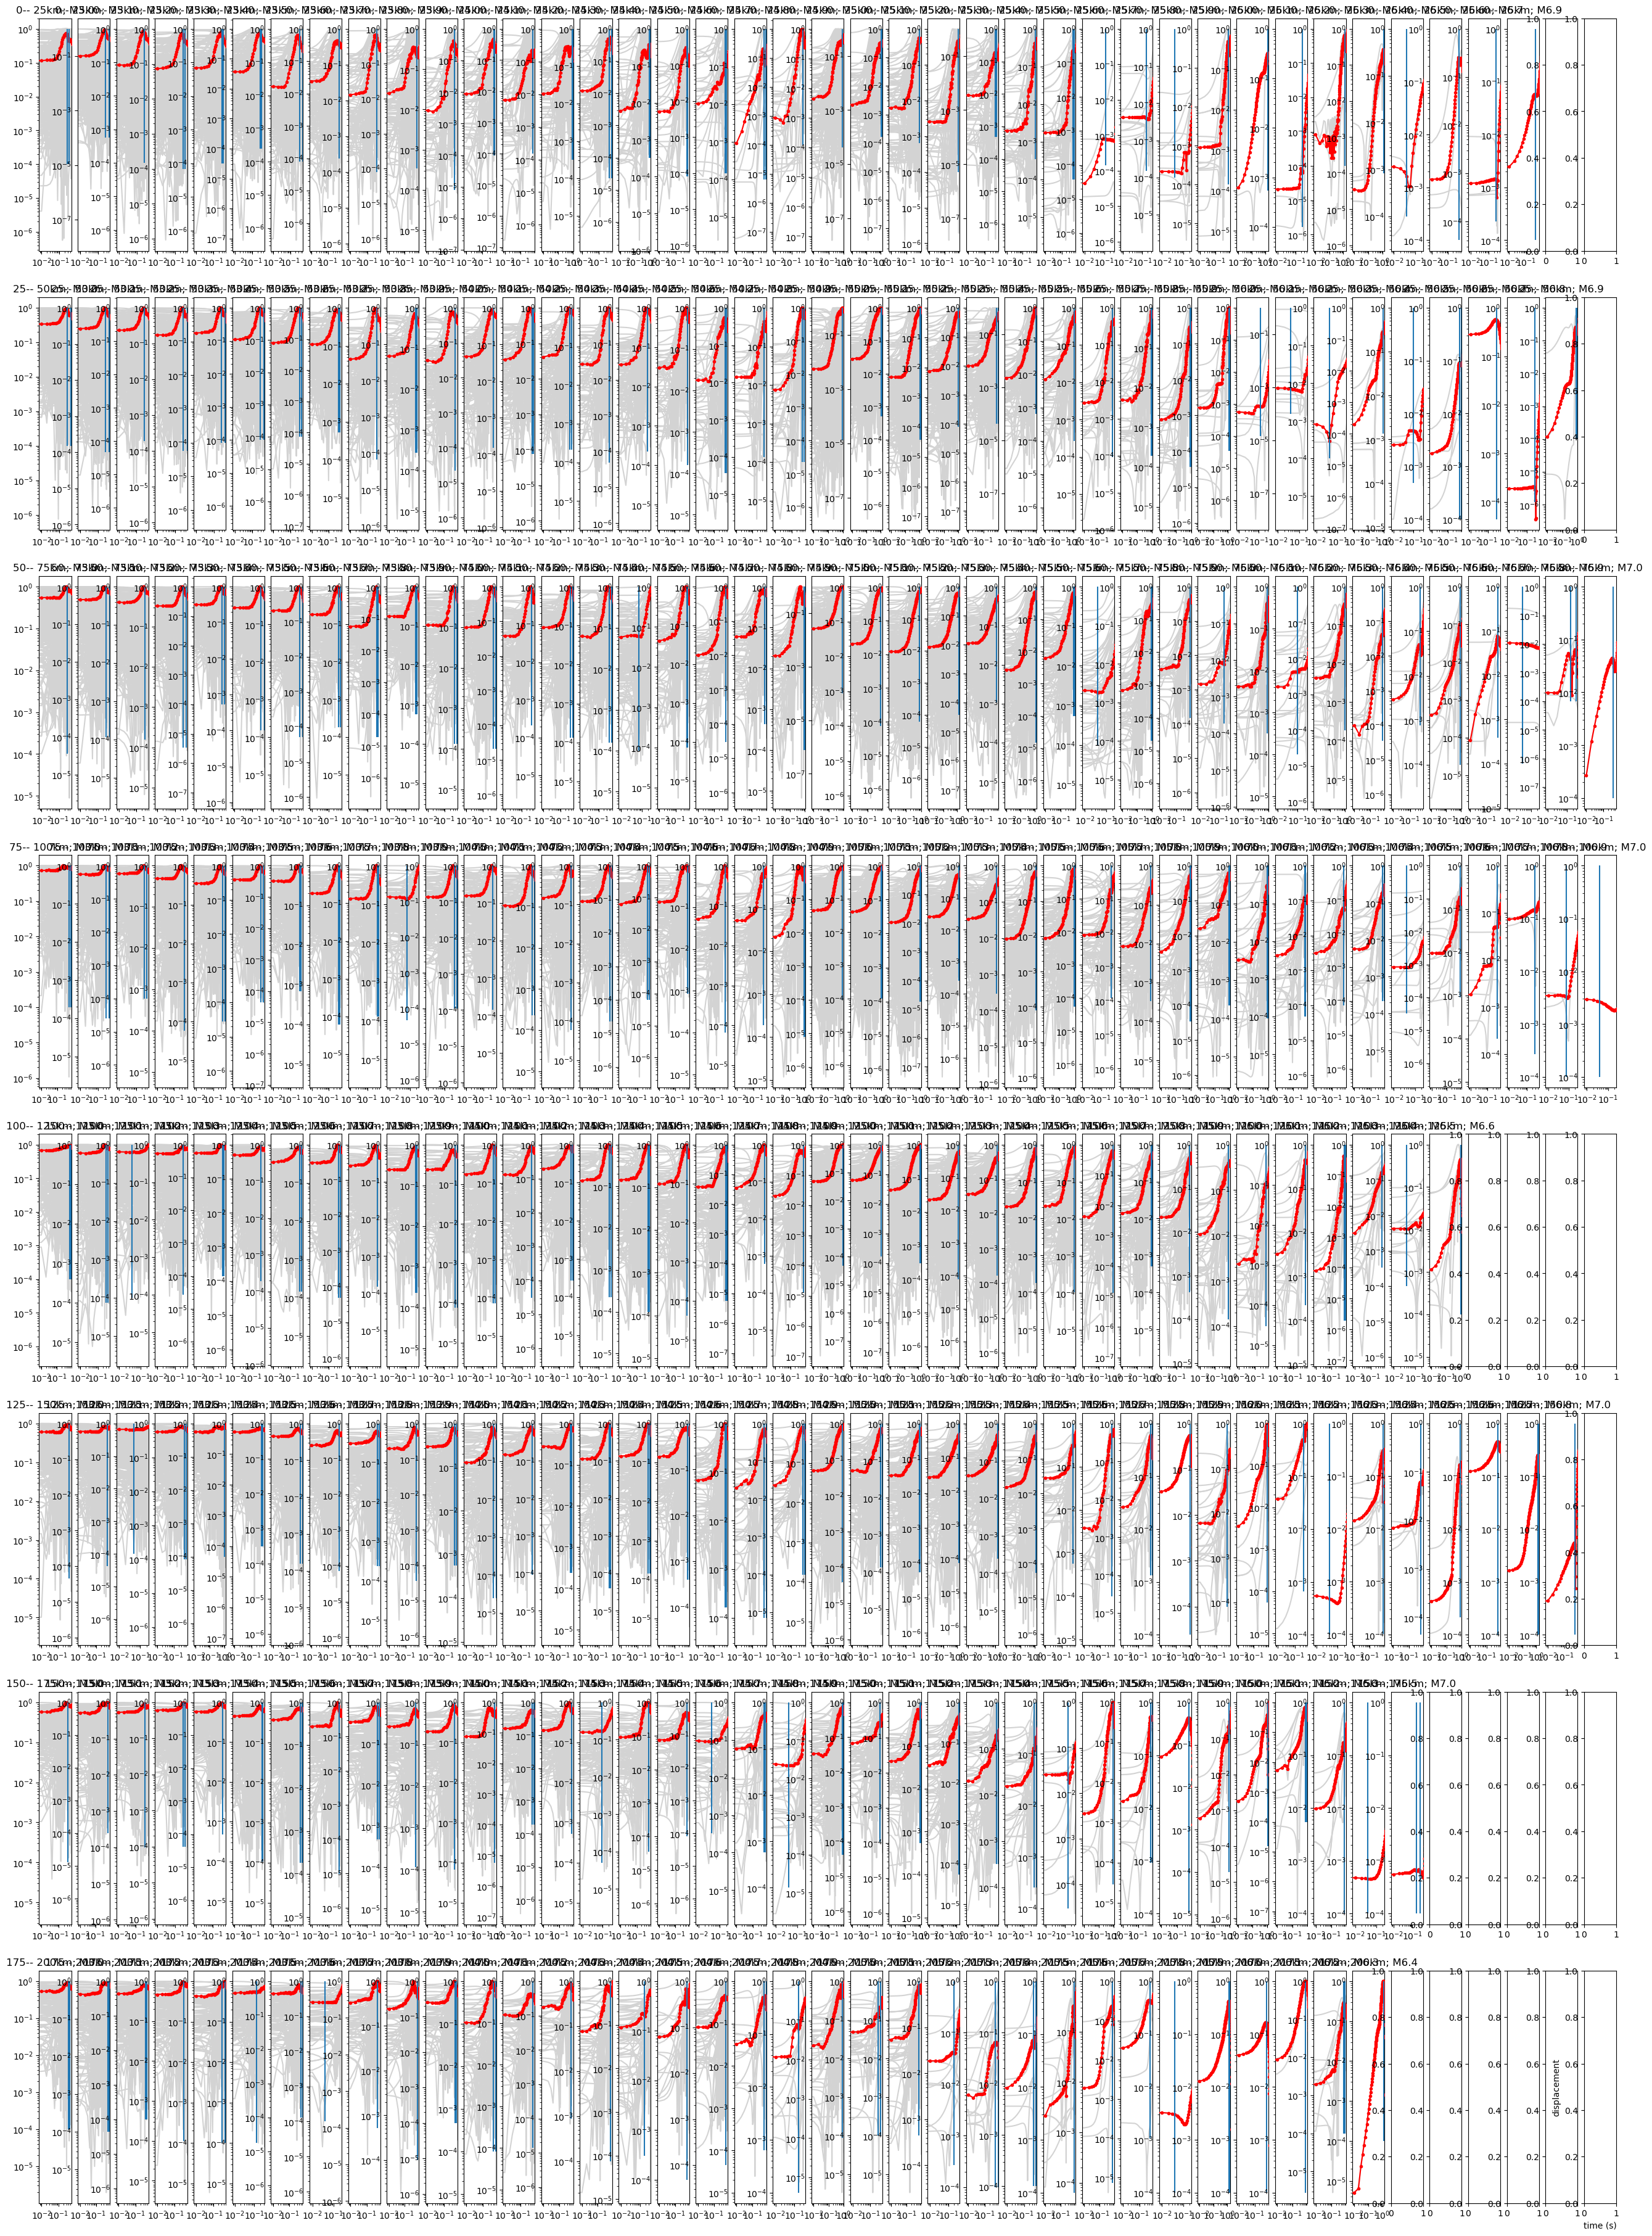

In [25]:
fig, axs = plt.subplots(8, len(df.columns), figsize = (33,46)) #df.shape[1]-1
#fig, axs = plt.subplots(3, 3, figsize = (15,40)) #df.shape[1]-1
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns:#['3.0','4.0','5.0','6.0','7.0']:
        try:
            #print('for column')
            #aad[column][row]=df[column][row]/counts[column][row]#df = sum of absolute displacements
            aad[column][row]=np.median(np.array(ad[column][row]), 0)
            aad_bin = aad[column][row]
            # now to find where departure delay exceeds DPD
            # 'simple sequential computation ... comparing the amplitude at a sample
            # with the one at the previous sample ...regardless of the magntiude of the decline'
            # Noda and Ellsworth 2016
            DPD_time = 0.05
            DPD_samples = DPD_time*100 # sampling rate is 100 Hz
            delay_time = []
            decline = 0 # count how many amplitudes have decreased in a row

            for point in range(1,len(aad_bin)):
                #print('for point in aad')
                if aad_bin[point]<aad_bin[point-1]:
                    #print('less than previous point')
                    decline += 1
                    if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                        delay_time.append(point)
                else:
                    decline = 0 #reset decline counter
            T_dp = np.array(delay_time)/sampling_rate # convert to seconds
            if len(T_dp)>0:
                print(T_dp[0:5])
                for i in range(0, min(2, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                    #axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
                    axs[row_count][col_count].vlines(T_dp[i], 0.0001, 1, zorder = 100)
                if float("{:.2f}".format(T_dp[0]))>0.2:
                    print(column, row_count, T_dp[0], counts[column][row])
                    results[row].append([column, row_count, T_dp[0], counts[column][row]])
                elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                    print(column, row_count, T_dp[1], counts[column][row])
                    results[row].append([column, row_count, T_dp[1], counts[column][row]])
            axs[row_count][col_count].plot(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:500]), zorder = 50, color = 'red', marker = '.')
            for ind_ad in ad[column][row]:
                axs[row_count][col_count].plot(np.arange(0, 5, 0.01), ind_ad[:500]/max(ind_ad[:500]), color='lightgrey')
            axs[row_count][col_count].set_xscale('log')
            axs[row_count][col_count].set_yscale('log') # in log space
            axs[row_count][col_count].set_title(str((row*25)) + '-- ' + str((row+1)*25) + 'km; M' + column)
            axs[row_count][col_count].set_xlim([0, T_dp[0]+0.2])
            col_count += 1
        except Exception:
            continue
            col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/delay_time/zoom_investigate_plot_all.pdf')
plt.show()

In [16]:
str((row*25)) + '-- ' str((row+1)*25) + 'km; M' + column

SyntaxError: invalid syntax (3505308512.py, line 1)

In [15]:
mags_plot_100 = []
dist_plot_100 = []
dt_plot_100 = []
n_plot_100 = []
#for k in results:
for l in results:
    mags_plot_100.append(float(l[0]))
    dist_plot_100.append(l[1])
    dt_plot_100.append(l[2])
    n_plot_100.append(l[3])

In [13]:
results_non_cat = results.copy()

In [176]:
 results = results_snr_100

In [14]:
results = np.concatenate(results)
df1 = pd.DataFrame({'mag':[], 'dist':[],'delaytime':[],'n':[]})

In [16]:
df1 = pd.DataFrame({'mag':results[0][0], 'dist':float(results[0][1]),'delaytime':float(results[0][2]),'n':float(results[0][3])}, index=[0])
for i in range(1, len(results)):
    df2 = pd.DataFrame({'mag':results[i][0], 'dist':float(results[i][1]),'delaytime':float(results[i][2]),'n':float(results[i][3])}, index=[0])
    df1 = df1.append(df2)


/tmp/ipykernel_3782592/2127473225.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_3782592/2127473225.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_3782592/2127473225.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_3782592/2127473225.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_3782592/2127473225.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_

In [17]:
df3 = df1.sort_values('n', ascending=False)


In [22]:
df3['mag']

0    5.1
0    5.2
0    5.4
0    5.5
0    5.6
    ... 
0    7.0
0    6.0
0    6.1
0    6.2
0    6.3
Name: mag, Length: 309, dtype: object

In [32]:
df3.loc[np.array(df3['mag']).astype(float)==3, "delaytime"]

0    0.29
0    0.27
0    0.29
0    0.57
0    0.61
0    0.47
0    0.32
0    0.39
Name: delaytime, dtype: float64

In [21]:
scipy.stats.linregress(np.array(df3['mag']).astype(float),np.array(df3['delaytime']).astype(float))

LinregressResult(slope=0.1269858053516551, intercept=-0.012283339438028618, rvalue=0.4867091117158322, pvalue=8.78676007341272e-20, stderr=0.013008022880217724, intercept_stderr=0.06528298254370071)

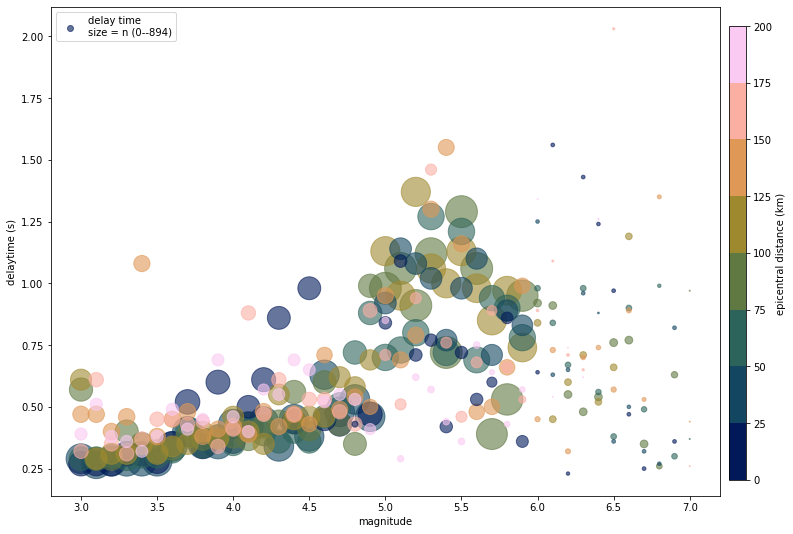

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # setup the plot
cmap = cm.batlow # define the colormap
# extract all colors from the .oslo map
cmaplist = [cmap(i) for i in range(0,cmap.N,28)]

# create the new map
new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 200, 9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

ax.scatter(np.array(df3['mag']).astype(float), np.array(df3['delaytime']).astype(float), marker = 'o', alpha = 0.6, s = np.array(df3['n']).astype(float),c = np.array(df3['dist']).astype(float)*25, cmap=new_cmap)#, norm = norm)
ax.scatter([], [], marker = 'o', alpha = 0.6, label = 'delay time \nsize = n (0--894)',color = cmaplist[0])#, norm = norm)
#plt.scatter(mags_plot_10, dt_plot_10, marker = 'o', alpha = 0.6, label = 'snr >10') #c = dist_plot_10, 
#plt.scatter(mags_plot_10, dt_plot_10, marker = 'o', alpha = 0.6, label = 'snr >10') #c = dist_plot_10, 



# make the scatter
#scat = ax.scatter(x, y, c=tag, s=np.random.randint(100, 500, 20),cmap=cmap, norm=norm)



x = (np.array(mags_plot_100)-5).astype(float)
y = (np.array(dt_plot_100)).astype(float)
x_unique = np.arange(-2,3,0.1)
result = scipy.stats.linregress(x,y)
a = result.slope
b = result.intercept
std_a = result.stderr
std_b = result.intercept_stderr

y_1 = (a+std_a)*x_unique + (b+std_b)
y_2 = (a+std_a)*x_unique + (b-std_b)
y_3 = (a-std_a)*x_unique + (b+std_b)
y_4 = (a-std_a)*x_unique + (b-std_b)


y_min_1sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_1sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))

y_1 = (a+2*std_a)*x_unique + (b+2*std_b)
y_2 = (a+2*std_a)*x_unique + (b-2*std_b)
y_3 = (a-2*std_a)*x_unique + (b+2*std_b)
y_4 = (a-2*std_a)*x_unique + (b-2*std_b)

y_min_2sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_2sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))        

#plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
ax.fill_between(x_unique+5, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.4, zorder = 100, label = '1sd')
ax.fill_between(x_unique+5, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.4, zorder = 99, label = '2sd')
popt = np.polyfit(x, y, 1)
ax.plot(x_unique+5, a*(x_unique)+b, color='#003f5c',zorder=102,label='{a:.2f}x+{b:.2f}\npearson r: {r:.4f}'.format(a=result.slope,b=result.intercept-5*result.slope,r=result.rvalue))
#ax.colorbar(label='distance (km)')        
'''
plt.ylabel('delaytime (s)')
plt.xlabel('magnitude')
fig = plt.gcf()
ax.legend()
fig.set_size_inches(12,9)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.91, 0.15, 0.02, 0.7])
#cax, _ = mpl.colorbar.make_axes(plt.gca(), shrink=0.8)
cbar = mpl.colorbar.ColorbarBase(ax2, cmap=new_cmap, label='epicentral distance (km)',
                       norm=norm,
    spacing='proportional', ticks=np.array(bounds), boundaries=bounds, format='%1i')



#plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/delay_time/delaytime_mag_scatter_line_of_best_fit_sorted_dots_discrete_color_bar.pdf')

In [61]:
df3

mag  dist  delaytime       n
0   5.1   3.0       1.06  1019.0
0   5.2   3.0       0.91  1019.0
0   5.4   3.0       0.72  1019.0
0   5.5   3.0       1.29  1019.0
0   5.6   3.0       1.06  1019.0
..  ...   ...        ...     ...
0   7.0   3.0       0.97     1.0
0   6.0   7.0       1.34     1.0
0   6.1   7.0       0.54     1.0
0   6.2   7.0       0.74     1.0
0   6.3   7.0       0.62     1.0

[309 rows x 4 columns]

In [73]:
df3.sort_values('mag')

mag  dist  delaytime      n
0   3.0   7.0       0.39  148.0
0   3.0   2.0       0.29  560.0
0   3.0   4.0       0.61  445.0
0   3.0   5.0       0.47  272.0
0   3.0   6.0       0.32  208.0
..  ...   ...        ...    ...
0   6.9   2.0       0.30   32.0
0   7.0   6.0       0.26    1.0
0   7.0   5.0       0.44    1.0
0   7.0   2.0       0.37    1.0
0   7.0   3.0       0.97    1.0

[309 rows x 4 columns]

In [80]:
y

array([0.32, 0.61, 0.35, 0.31, 0.37, 0.45, 0.45, 0.43, 0.44, 0.34, 0.41,
       0.88, 0.47, 0.61, 0.47, 0.53, 0.53, 0.48, 0.43, 0.89, 0.71, 0.51,
       0.94, 1.46, 0.76, 0.46, 0.68, 0.89, 0.66, 0.53, 0.89, 1.09, 0.71,
       0.65, 2.03, 0.26])

In [90]:
x

array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [101]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

[3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9]
[3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9]
[3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9]
[3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9]
[3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9]
[3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9]
[3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9]
[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]


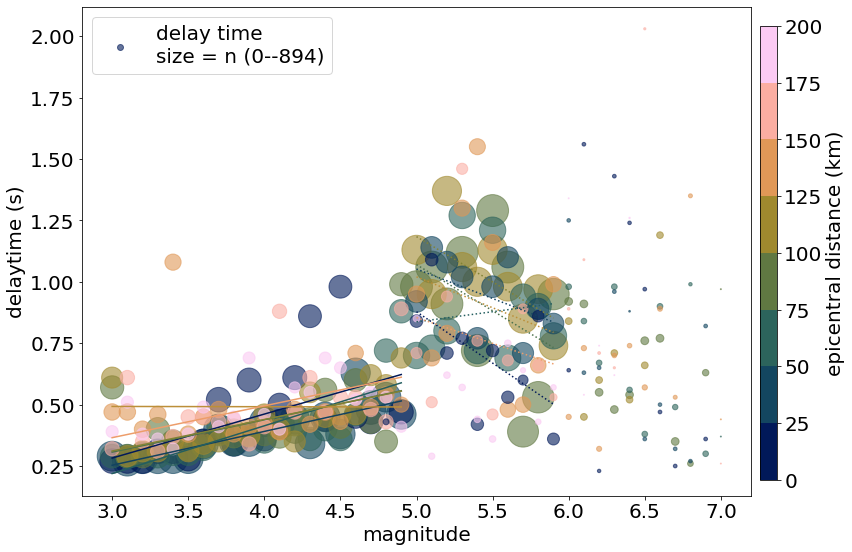

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # setup the plot
cmap = cm.batlow # define the colormap
# extract all colors from the .oslo map
cmaplist = [cmap(i) for i in range(0,cmap.N,28)]

# create the new map
new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 200, 9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

ax.scatter(np.array(df3['mag']).astype(float), np.array(df3['delaytime']).astype(float), 
           marker = 'o', alpha = 0.6, s = np.array(df3['n']).astype(float),
           c = np.array(df3['dist']).astype(float)*25, cmap=new_cmap)#, norm = norm)
ax.scatter([], [], marker = 'o', alpha = 0.6, label = 'delay time \nsize = n (0--894)',color = cmaplist[0])#, norm = norm)
#plt.scatter(mags_plot_10, dt_plot_10, marker = 'o', alpha = 0.6, label = 'snr >10') #c = dist_plot_10, 
#plt.scatter(mags_plot_10, dt_plot_10, marker = 'o', alpha = 0.6, label = 'snr >10') #c = dist_plot_10, 



# make the scatter
#scat = ax.scatter(x, y, c=tag, s=np.random.randint(100, 500, 20),cmap=cmap, norm=norm)


for dist in np.arange(0,7):
    #df3['mag']
    df4 = df3.loc[df3["dist"] == dist, ['mag', 'delaytime']].sort_values('mag')
    #df4 = df4[df4['mag']<5]
    x = np.array(df4['mag']).astype(float)[0:20]#(np.array(mags_plot_100)-5).astype(float)
    y = np.array(df4['delaytime']).astype(float)[0:20]#(np.array(dt_plot_100)).astype(float)
    print(x)
    x_unique = np.arange(-2,0,0.1)
    result = scipy.stats.linregress(x,y)
    a = result.slope
    b = result.intercept
    std_a = result.stderr
    std_b = result.intercept_stderr

    y_1 = (a+std_a)*x_unique + (b+std_b)
    y_2 = (a+std_a)*x_unique + (b-std_b)
    y_3 = (a-std_a)*x_unique + (b+std_b)
    y_4 = (a-std_a)*x_unique + (b-std_b)


    y_min_1sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
    y_max_1sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))

    y_1 = (a+2*std_a)*x_unique + (b+2*std_b)
    y_2 = (a+2*std_a)*x_unique + (b-2*std_b)
    y_3 = (a-2*std_a)*x_unique + (b+2*std_b)
    y_4 = (a-2*std_a)*x_unique + (b-2*std_b)

    y_min_2sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
    y_max_2sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))        

    #plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
    #ax.fill_between(x_unique+5, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.4, zorder = 100, label = '1sd')
    #ax.fill_between(x_unique+5, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.4, zorder = 99, label = '2sd')
    popt = np.polyfit(x, y, 1)
    ax.plot(x_unique+5, a*(x_unique)+(b+5*a), color= new_cmap([dist/8]),zorder=102)#,label='{a:.2f}x+{b:.2f}'.format(a=result.slope,b=result.intercept-5*result.slope))
#ax.colorbar(label='distance (km)')        
for dist in np.arange(0,7):
    #df3['mag']
    df4 = df3.loc[df3["dist"] == dist, ['mag', 'delaytime']].sort_values('mag')
    #df4 = df4[df4['mag']<5]
    x = np.array(df4['mag']).astype(float)[20:30]#(np.array(mags_plot_100)-5).astype(float)
    y = np.array(df4['delaytime']).astype(float)[20:30]#(np.array(dt_plot_100)).astype(float)
    print(x)
    x_unique = np.arange(0,1,0.1)
    result = scipy.stats.linregress(x,y)
    a = result.slope
    b = result.intercept
    std_a = result.stderr
    std_b = result.intercept_stderr

    y_1 = (a+std_a)*x_unique + (b+std_b)
    y_2 = (a+std_a)*x_unique + (b-std_b)
    y_3 = (a-std_a)*x_unique + (b+std_b)
    y_4 = (a-std_a)*x_unique + (b-std_b)


    y_min_1sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
    y_max_1sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))

    y_1 = (a+2*std_a)*x_unique + (b+2*std_b)
    y_2 = (a+2*std_a)*x_unique + (b-2*std_b)
    y_3 = (a-2*std_a)*x_unique + (b+2*std_b)
    y_4 = (a-2*std_a)*x_unique + (b-2*std_b)

    y_min_2sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
    y_max_2sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))        

    #plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
    #ax.fill_between(x_unique+5, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.4, zorder = 100, label = '1sd')
    #ax.fill_between(x_unique+5, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.4, zorder = 99, label = '2sd')
    popt = np.polyfit(x, y, 1)
    ax.plot(x_unique+5, a*(x_unique)+(b+5*a), linestyle = ':', color= new_cmap([dist/8]),zorder=102)#,label='{a:.2f}x+{b:.2f}'.format(a=result.slope,b=result.intercept-5*result.slope))
#ax.colorbar(label='distance (km)')   

plt.ylabel('delaytime (s)')
plt.xlabel('magnitude')
fig = plt.gcf()
ax.legend()
fig.set_size_inches(12,9)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.91, 0.15, 0.02, 0.7])
#cax, _ = mpl.colorbar.make_axes(plt.gca(), shrink=0.8)
cbar = mpl.colorbar.ColorbarBase(ax2, cmap=new_cmap, label='epicentral distance (km)',
                       norm=norm,
    spacing='proportional', ticks=np.array(bounds), boundaries=bounds, format='%1i')



plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/delay_time/break_scaling_delaytime_mag_scatter_line_of_best_fit_sorted_dots_discrete_color_bar.pdf')


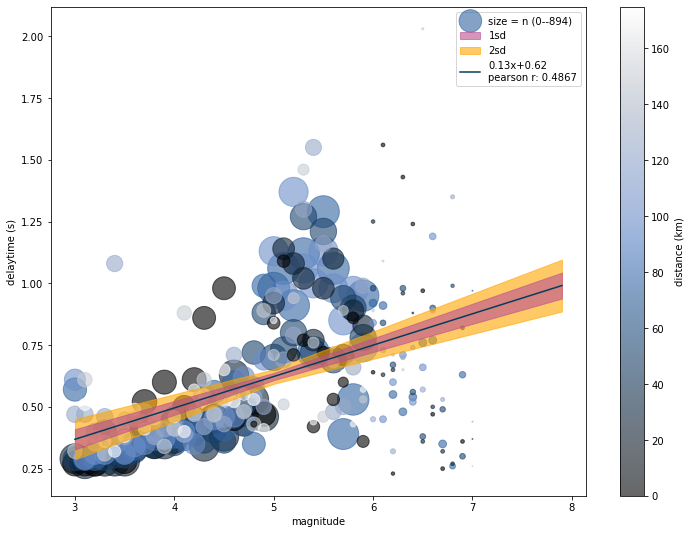

In [19]:
plt.scatter(np.array(df3['mag']).astype(float), np.array(df3['delaytime']).astype(float), marker = 'o', alpha = 0.6, s = np.array(df3['n']).astype(float),label = 'size = n (0--894)',c = np.array(df3['dist']).astype(float)*25, cmap=cm.oslo)
#plt.scatter(mags_plot_10, dt_plot_10, marker = 'o', alpha = 0.6, label = 'snr >10') #c = dist_plot_10, 

x = (np.array(mags_plot_100)-5).astype(float)
y = (np.array(dt_plot_100)).astype(float)
x_unique = np.arange(-2,3,0.1)
result = scipy.stats.linregress(x,y)
a = result.slope
b = result.intercept
std_a = result.stderr
std_b = result.intercept_stderr

y_1 = (a+std_a)*x_unique + (b+std_b)
y_2 = (a+std_a)*x_unique + (b-std_b)
y_3 = (a-std_a)*x_unique + (b+std_b)
y_4 = (a-std_a)*x_unique + (b-std_b)


y_min_1sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_1sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))

y_1 = (a+2*std_a)*x_unique + (b+2*std_b)
y_2 = (a+2*std_a)*x_unique + (b-2*std_b)
y_3 = (a-2*std_a)*x_unique + (b+2*std_b)
y_4 = (a-2*std_a)*x_unique + (b-2*std_b)

y_min_2sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_2sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))        

#plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
plt.fill_between(x_unique+5, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.6, zorder = 100, label = '1sd')
plt.fill_between(x_unique+5, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.6, zorder = 99, label = '2sd')
popt = np.polyfit(x, y, 1)
plt.plot(x_unique+5, a*(x_unique)+b, color='#003f5c',zorder=102,label='{a:.2f}x+{b:.2f}\npearson r: {r:.4f}'.format(a=result.slope,b=result.intercept,r=result.rvalue))
plt.colorbar(label='distance (km)')        
plt.legend()
plt.ylabel('delaytime (s)')
plt.xlabel('magnitude')
fig = plt.gcf()
fig.set_size_inches(12,9)

In [42]:
x

array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
       -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
        0.2,  0.3,  0.4,  0.5,  0.6,  1. ,  1.1,  1.4, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.8,  1.4, -2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4,
       -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3,
       -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.8,  0.9,
        1. ,  1.1,  1.3,  1.4, -2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4,
       -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3,
       -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.6,  0.7,  0.8,  0.9,
        1. ,  1.1,  1.3,  1.4,  1.7, -2. , -1.9, -1.8, -1.7, -1.6, -1.5,
       -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4,
       -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0

In [46]:
np.array(y).astype(float)


array([0.27, 0.27, 0.27, 0.31, 0.31, 0.28, 0.35, 0.52, 0.34, 0.6 , 0.36,
       0.5 , 0.61, 0.86, 0.44, 0.98, 0.45, 0.43, 0.43, 0.47, 0.38, 1.05,
       0.63, 0.4 , 0.23, 0.66, 0.92, 0.56, 1.57, 1.36, 0.29, 0.27, 0.28,
       0.28, 0.28, 0.28, 0.34, 0.4 , 0.35, 0.35, 0.43, 0.42, 0.44, 0.34,
       0.45, 0.38, 0.63, 0.48, 0.53, 0.46, 0.58, 0.41, 0.59, 0.79, 0.37,
       0.41, 0.47, 0.97, 0.88, 0.29, 0.29, 0.3 , 0.29, 0.3 , 0.3 , 0.32,
       0.41, 0.34, 0.38, 0.35, 0.43, 0.39, 0.36, 0.4 , 0.36, 0.46, 0.51,
       0.72, 0.88, 0.78, 0.84, 0.26, 0.82, 0.43, 0.48, 0.62, 0.67, 0.6 ,
       0.36, 0.56, 1.1 , 1.3 , 0.57, 0.29, 0.29, 0.4 , 0.35, 0.32, 0.33,
       0.38, 0.37, 0.38, 0.38, 0.37, 0.42, 0.44, 0.56, 0.41, 0.6 , 0.43,
       0.35, 0.99, 0.57, 0.81, 0.43, 0.49, 0.39, 0.36, 0.61, 0.95, 0.21,
       0.21, 0.24, 0.55, 0.73, 1.13, 0.61, 0.29, 0.31, 0.31, 0.35, 0.31,
       0.34, 0.35, 0.4 , 0.37, 0.46, 0.4 , 0.35, 0.55, 0.45, 0.46, 0.46,
       0.62, 0.58, 0.69, 0.91, 0.59, 0.39, 0.51, 0.

In [44]:
result = scipy.stats.linregress(x,y)


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U4'), dtype('<U4')) -> None